In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
data=pd.read_csv("C:/Datasets/run_or_walk.csv")
print (data.head(6))

        date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   
5  2017-6-30   13:51:17:46806991   viktor      0         0          0.4044   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922  
5         -0.8056         -0.0956  0.6925 -0.2179  2.5750  


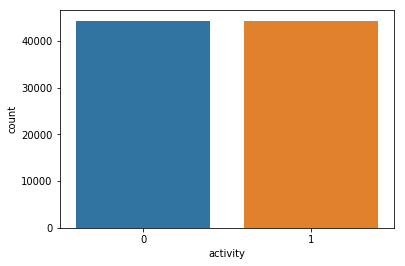

In [7]:
import seaborn as sns
sns.countplot(data['activity'],label="Count")
plt.show()

In [9]:
pred_columns=data[:]
pred_columns.drop(['date'],axis=1,inplace=True)
pred_columns.drop(['time'],axis=1,inplace=True)
pred_columns.drop(['username'],axis=1,inplace=True)
pred_columns.drop(['wrist'],axis=1,inplace=True)
pred_columns.drop(['activity'],axis=1,inplace=True)

prediction_var=pred_columns.columns
print(list(prediction_var))

['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


In [10]:
train,test=train_test_split(data,test_size=0.3)

print(train.shape)
print(test.shape)

(62011, 11)
(26577, 11)


In [11]:
train_X=train[prediction_var] #taking training data as input
train_y=train['activity']     #This is the output of  our training data

print(list(train.columns))    #Printing the list of columns

test_X=test[prediction_var]   #taking test data as input
test_y=test['activity']       #This is the output of our test data


['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


In [14]:
df=pd.DataFrame(prediction,test_y)
print(df)

print(metrics.accuracy_score(prediction,test_y))

gnb=GaussianNB()
y_pred_gnb=gnb.fit(train_X,train_y)
target_pred=y_pred_gnb.predict(test_X)

cnf_matrix_gnb=confusion_matrix(test_y,y_pred_gnb)
print(cnf_matrix_gnb)
print(metrics.accuracy_score(y_pred_gnb,test_y))
print("Number of mislabeled points out of a total %d points: %d" %(data.shape[0],(test_y !=y_pred_gnb).sum()))
print(accuracy_score(test_y,target_pred))

cnf_matrix_gnb=confusion_matrix(test_y, y_pred_gnb)
print(cnf_matrix_gnb)

NameError: name 'prediction' is not defined

In [3]:
from sklearn import svm
model=svm.svc(kernel='linear',c=1,gamma=1)

AttributeError: module 'sklearn.svm' has no attribute 'svc'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.use("Agg")

from sklearn.naive_bayes import  MultinomialNB
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.metrics import  accuracy_score
from sklearn import svm
import random

data=pd.read_csv('C:/Datasets/College.csv')
print(data.head(6))

  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   
5     Yes   587     479     158         38         62          678   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   
5           41     13500        3335    500       675   67        73   

   S

In [5]:
data.Private=pd.Categorical(data.Private)
data['Private']=data.Private.cat.codes
print(data.head())

   Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  

In [8]:
random.seed(2)
pred_columns=data[:]
pred_columns.drop(['Private'],axis=1,inplace=True)
pred_columns.drop(['Apps'],axis=1,inplace=True)
pred_columns.drop(['Accept'],axis=1,inplace=True)
pred_columns.drop(['Enroll'],axis=1,inplace=True)

prediction_var=pred_columns.columns
print(list(prediction_var))

['Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


In [9]:
train,test=train_test_split(data,test_size=0.3)

print(train.shape)
print(test.shape)


(543, 18)
(234, 18)


In [11]:
train_X=train[prediction_var]
train_y=train['Private']

print(list(train.columns))

['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


In [13]:
test_X=test[prediction_var]
test_y=test['Private']


In [ ]:
model=svm.SVC(kernel='linear')
model.fit(train_X,train_y)
predicted=model.predict(test_X)
print("SVM Accuracy:",accuracy_score(test_y,predicted))